In [28]:
import os
from glob import glob

from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns
import cv2
import PIL
import pytesseract
import spacy

import warnings
warnings.filterwarnings('ignore')

# 01_pytesseract

In [22]:
# Get the file paths of images
filepath_lst = glob('DATA/Selected/*.jpeg')
# filepath_lst

In [3]:
# Select one image
filepath = filepath_lst[0]
print(filepath)

DATA/Selected\000.jpeg


In [4]:
# Display image using cv2
img_cv2 = cv2.imread(filepath)
cv2.imshow('business_card', img_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
type(img_cv2)

numpy.ndarray

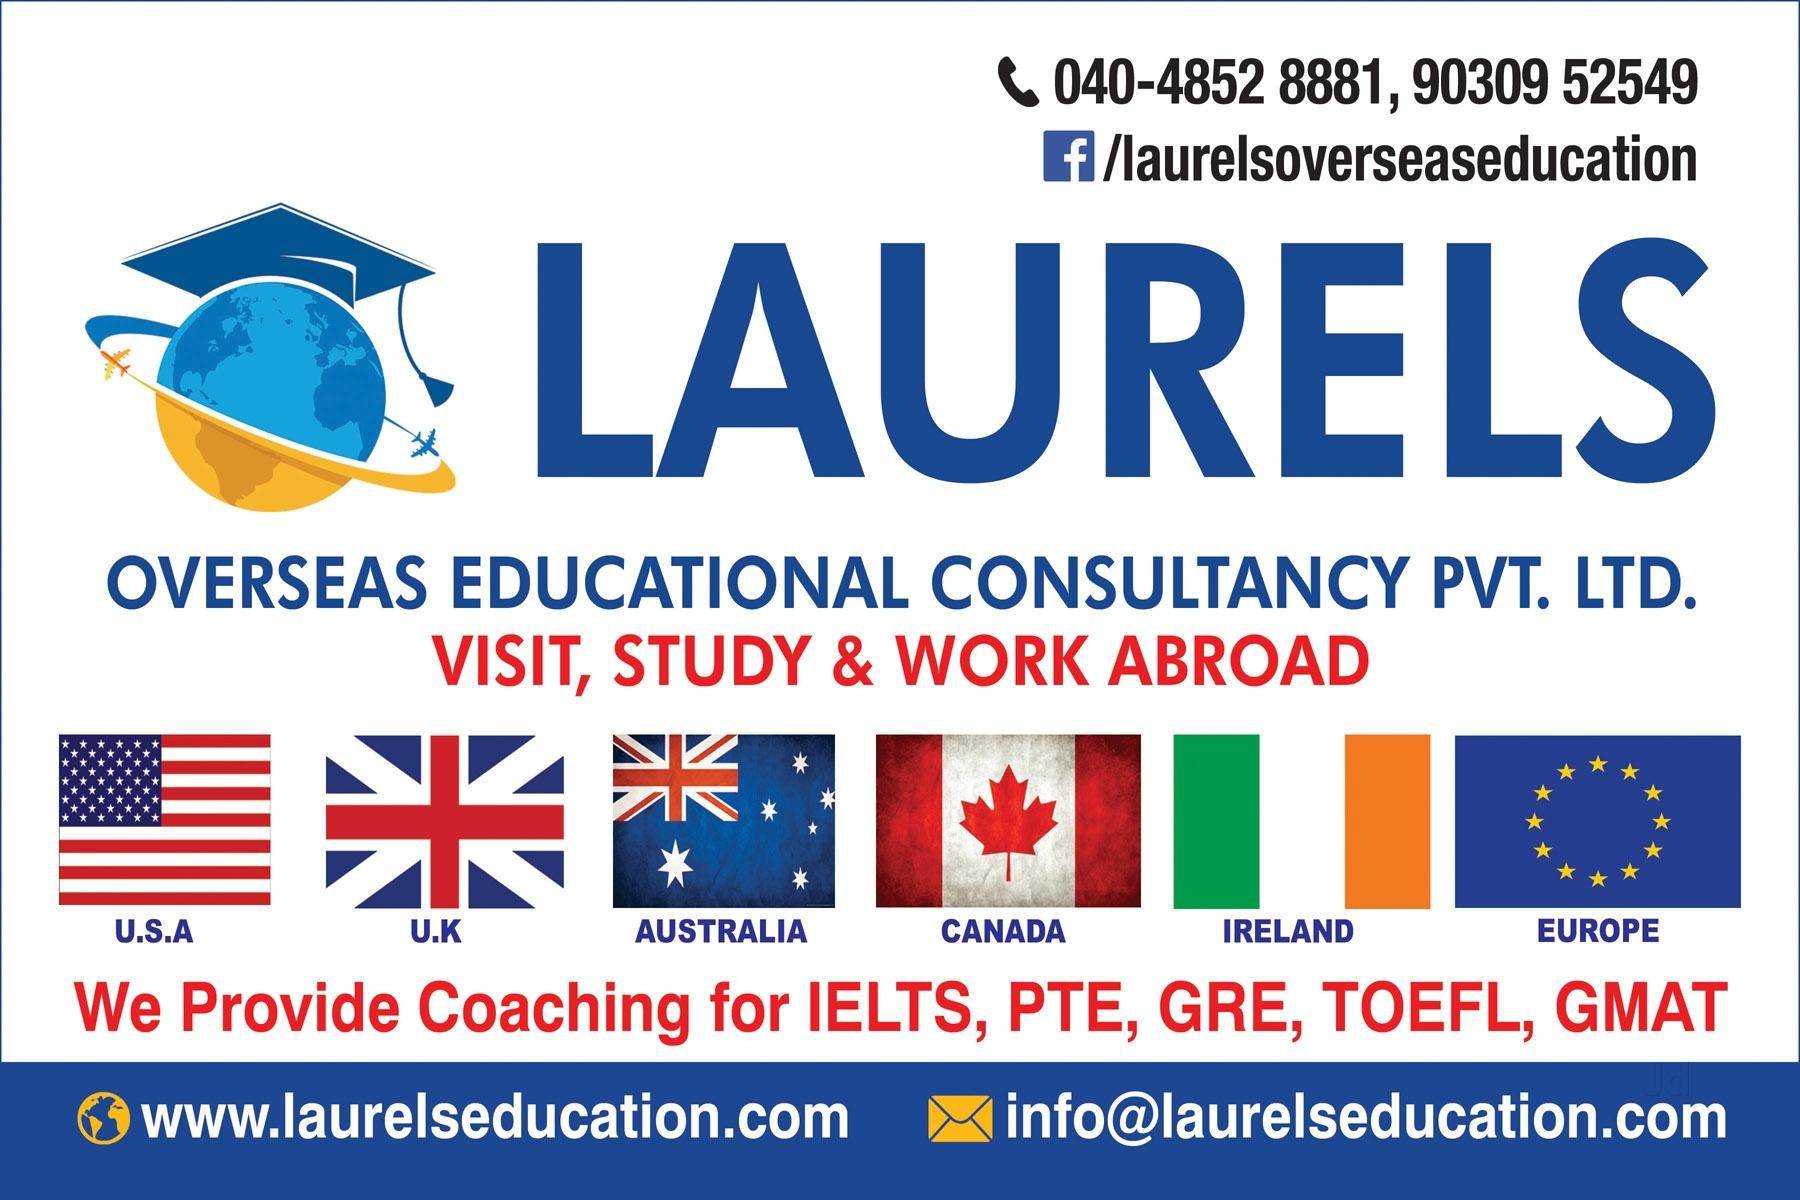

In [6]:
# Display image using PIL
img_pil = PIL.Image.open(filepath)
img_pil

In [7]:
type(img_pil)

PIL.JpegImagePlugin.JpegImageFile

### Extracting text using pytesseract
- pytesseract supports openCV and PIL
- pytesseract works in Hierarchy
| LEVELS | Types |
| :- | :- |
| Level_1 | Pages |
| Level_2 | Blocks |
| Level_3 | Paragraphs |
| Level_4 | Lines |
| Level_5 | Wrods |
- from Words Alphabets are extracted and given to ML models

In [8]:
text_cv = pytesseract.image_to_string(image=img_cv2)
print(text_cv)

 

. 040-4852 8881, 90309 52549
Fi /laurelsoverseaseducation

“@: LAURELS

OVERSEAS EDUCATIONAL CONSULTANCY PVT. LTD.

Ir. Sa
| "gin <
U.K

AUSTRALIA CANADA IRELAND

 

     

 

 

©) www.laurelseducation.com )%info@laurelseducation.com

 




In [9]:
text_pil = pytesseract.image_to_string(image=img_pil)
print(text_pil)

 

. 040-4852 8881, 90309 52549
Fi /laurelsoverseaseducation

“@: LAURELS

OVERSEAS EDUCATIONAL CONSULTANCY PVT. LTD.

Ny. Siam
| "dims
U.K

AUSTRALIA CANADA IRELAND

 

     

 

 

€3 www.laurelseducation.com )%info@laurelseducation.com

 




### Image to dataframe

In [10]:
raw_data = pytesseract.image_to_data(image=img_cv2)
print(raw_data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1800	1200	-1	
2	1	1	0	0	0	0	0	1800	1	-1	
3	1	1	1	0	0	0	0	1800	1	-1	
4	1	1	1	1	0	0	0	1800	1	-1	
5	1	1	1	1	1	0	0	1800	1	95	 
2	1	2	0	0	0	998	57	699	124	-1	
3	1	2	1	0	0	998	57	699	124	-1	
4	1	2	1	1	0	998	57	699	57	-1	
5	1	2	1	1	1	998	57	41	50	39	.
5	1	2	1	1	2	1055	58	209	46	96	040-4852
5	1	2	1	1	3	1280	58	118	56	96	8881,
5	1	2	1	1	4	1413	58	135	46	96	90309
5	1	2	1	1	5	1563	58	134	46	96	52549
4	1	2	1	2	0	1044	131	652	50	-1	
5	1	2	1	2	1	1029	127	65	66	73	Fi
5	1	2	1	2	2	1103	131	593	50	73	/laurelsoverseaseducation
2	1	3	0	0	0	85	203	1630	280	-1	
3	1	3	1	0	0	85	203	1630	280	-1	
4	1	3	1	1	0	85	203	1630	280	-1	
5	1	3	1	1	1	85	203	369	259	32	“@:
5	1	3	1	1	2	538	238	1177	245	96	LAURELS
2	1	4	0	0	0	108	555	1588	54	-1	
3	1	4	1	0	0	108	555	1588	54	-1	
4	1	4	1	1	0	108	555	1588	54	-1	
5	1	4	1	1	1	108	555	318	54	95	OVERSEAS
5	1	4	1	1	2	454	555	454	54	96	EDUCATIONAL
5	1	4	1	1	3	932	555	478	54	96	CONSULTANC

In [11]:
# Create raw data list
raw_data_lst = list(map(lambda x : x.split('\t'), raw_data.split('\n')))

# Create a dataframe with levels form raw data
df = pd.DataFrame(raw_data_lst[1:], columns=raw_data_lst[0])
df.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1800,1200,-1,
1,2,1,1,0,0,0,0,0,1800,1,-1,
2,3,1,1,1,0,0,0,0,1800,1,-1,
3,4,1,1,1,1,0,0,0,1800,1,-1,
4,5,1,1,1,1,1,0,0,1800,1,95,


In [12]:
# Level_5 in 'level' column represents the Words in 'text' column
# df[df['level'] == '5']

- Values are in unit of pixle
| LABEL | MEANING |
| :- | :- |
| left | Left position |
| top | Top position |
| width | Width of the box |
| height | Height of the box |
| conf | Classification Confidence score for a perticular word |

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      75 non-null     object
 1   page_num   74 non-null     object
 2   block_num  74 non-null     object
 3   par_num    74 non-null     object
 4   line_num   74 non-null     object
 5   word_num   74 non-null     object
 6   left       74 non-null     object
 7   top        74 non-null     object
 8   width      74 non-null     object
 9   height     74 non-null     object
 10  conf       74 non-null     object
 11  text       74 non-null     object
dtypes: object(12)
memory usage: 7.2+ KB


In [14]:
# Drop null values
df.dropna(inplace=True)

In [19]:
# Convert data types
num_cols = df.drop(columns='text').columns.to_list()
print(num_cols)
df[num_cols] = df[num_cols].astype('int')

['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf']


### Drawing the box based on levels

In [17]:
# Funtion to draw box based on levels
def draw_box (image_filepath, level):
    
    # Open the image with openCV or PIL
    image = cv2.imread(image_filepath)
    
    # Extract raw data form image with pytesseract
    raw_data = pytesseract.image_to_data(image=image)
    
    # Create raw data list
    raw_data_lst = list(map(lambda x : x.split('\t'), raw_data.split('\n')))

    # Create a dataframe with levels form raw data
    temp_df = pd.DataFrame(raw_data_lst[1:], columns=raw_data_lst[0])
    # Drop null values
    temp_df.dropna(inplace=True)
    # Convert data types
    num_cols = temp_df.drop(columns='text').columns.to_list()
    temp_df[num_cols] = temp_df[num_cols].astype('int')
    
    for l,x,y,w,h,c,txt in temp_df[['level','left','top','width','height','conf','text']].values:
        # print(l,x,y,w,h,c,txt)
        if level == 'page':
            if l == 1:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
            else:
                continue

        elif level == 'block':
            if l == 2:
                cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
            else:
                continue

        elif level == 'para':
            if l == 3:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            else:
                continue

        elif level == 'line':
            if l == 4:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            else:
                continue

        elif level == 'word':
            if l == 5:
                cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
                cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
            else:
                continue

    cv2.imshow("bounding_box",image)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [18]:
# draw_box(image_filepath=filepath_lst[30], level='line')

# 02_Data Preparation

In [29]:
allBusinessCard = pd.DataFrame(columns=['id','text'])

for filepath in tqdm(filepath_lst, desc='BusinessCard'):
    
    #imgPath = imgPaths[0]
    _, filename = os.path.split(filepath)
    # extract data and text 
    image = cv2.imread(filepath)
    data = pytesseract.image_to_data(image)
    dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
    df = pd.DataFrame(dataList[1:],columns=dataList[0])
    df.dropna(inplace=True)
    df['conf'] = df['conf'].astype(int)

    useFulData = df.query('conf >= 30')

    # Dataframe
    businessCard = pd.DataFrame()
    businessCard['text'] = useFulData['text']
    businessCard['id'] = filename
    
    # concatenation
    allBusinessCard = pd.concat((allBusinessCard,businessCard))

BusinessCard: 100%|██████████████████████████████████████████████████████████████████| 293/293 [04:52<00:00,  1.00it/s]


In [30]:
allBusinessCard

,id,text
4,000.jpeg,
8,000.jpeg,.
9,000.jpeg,040-4852
10,000.jpeg,"8881,"
11,000.jpeg,90309
...,...,...
58,292.jpeg,Salem
59,292.jpeg,OR
60,292.jpeg,97301
64,292.jpeg,


In [31]:
allBusinessCard.to_csv("allBusinessCard.csv", index=False)